# Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

# Load the Data

In [125]:
df = pd.read_csv("data/Youtube-Spam-Dataset.csv")

In [126]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


# Sanity Check of Data

In [127]:
df.shape

(1956, 6)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   VIDEO_NAME  1956 non-null   object
 5   CLASS       1956 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


In [129]:
df.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
VIDEO_NAME      0
CLASS           0
dtype: int64

In [130]:
df.duplicated().sum()

3

In [131]:
df['CLASS'].value_counts()

CLASS
1    1005
0     951
Name: count, dtype: int64

# Exploratory Data Anlaysis (EDA)

## Who are the 5 most commented people?

In [132]:
df["AUTHOR"].value_counts().sort_values(ascending=False)[:5]

AUTHOR
M.E.S              8
Louis Bryant       7
Shadrach Grentz    7
5000palo           7
DanteBTV           6
Name: count, dtype: int64

## What are the 5 most commented videos?

In [133]:
df["VIDEO_NAME"].value_counts().sort_values(ascending=False)[:5]

VIDEO_NAME
Eminem - Love The Way You Lie ft. Rihanna                 448
LMFAO - Party Rock Anthem ft. Lauren Bennett, GoonRock    438
Shakira - Waka Waka                                       370
PSY - GANGNAM STYLE(?????) M/V                            350
Katy Perry - Roar                                         350
Name: count, dtype: int64

## What days were the most comments written?

In [134]:
df["DATE"] = df["DATE"].apply(lambda x: str(x).split('T')[0])

In [135]:
df["DATE"].value_counts().sort_values(ascending=False)[1:5]

DATE
2014-11-07    74
2014-11-08    68
2015-05-26    66
2015-05-23    59
Name: count, dtype: int64

# Garbage Treatment

In [136]:
df.drop_duplicates(inplace=True)

# Feature Selection

In [137]:
df["comment_info"] = df["AUTHOR"] + "  " + df["VIDEO_NAME"] + "  " + df["CONTENT"]

In [138]:
X = df["comment_info"]
y = df["CLASS"]

# Train Test Split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1562,), (391,), (1562,), (391,))

# Model Building

In [140]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])

In [141]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

# Evaluation

In [142]:
y_pred = text_clf.predict(X_test)

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       170
           1       0.98      0.95      0.96       221

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391



In [144]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[166   4]
 [ 12 209]]


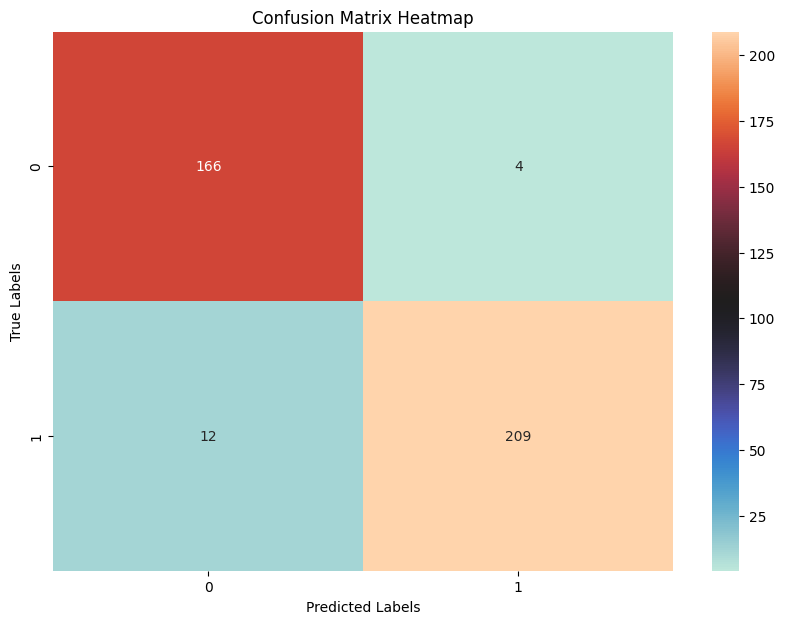

In [145]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='icefire')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Save our Model

In [146]:
import pickle

with open("youtube_comments_spam_detection_model.pkl", "wb") as file:
    pickle.dump(text_clf, file)

In [147]:
with open("youtube_comments_spam_detection_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)